In [1]:
from utils import CNC
from types import SimpleNamespace

In [2]:
args = SimpleNamespace(
    file_path = "./data/data.csv",
    model = "XGB",
    sampler = None,
    future_steps = 1,
    window_size = 3,
    test_size = 200,
    seed = 0,
)
cnc = CNC(args)

In [3]:
cnc.pre_process()

Creating rolling window features: 100%|██████████| 1211/1211 [00:00<00:00, 2959.02it/s]


In [4]:
cnc.train()

Training models: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


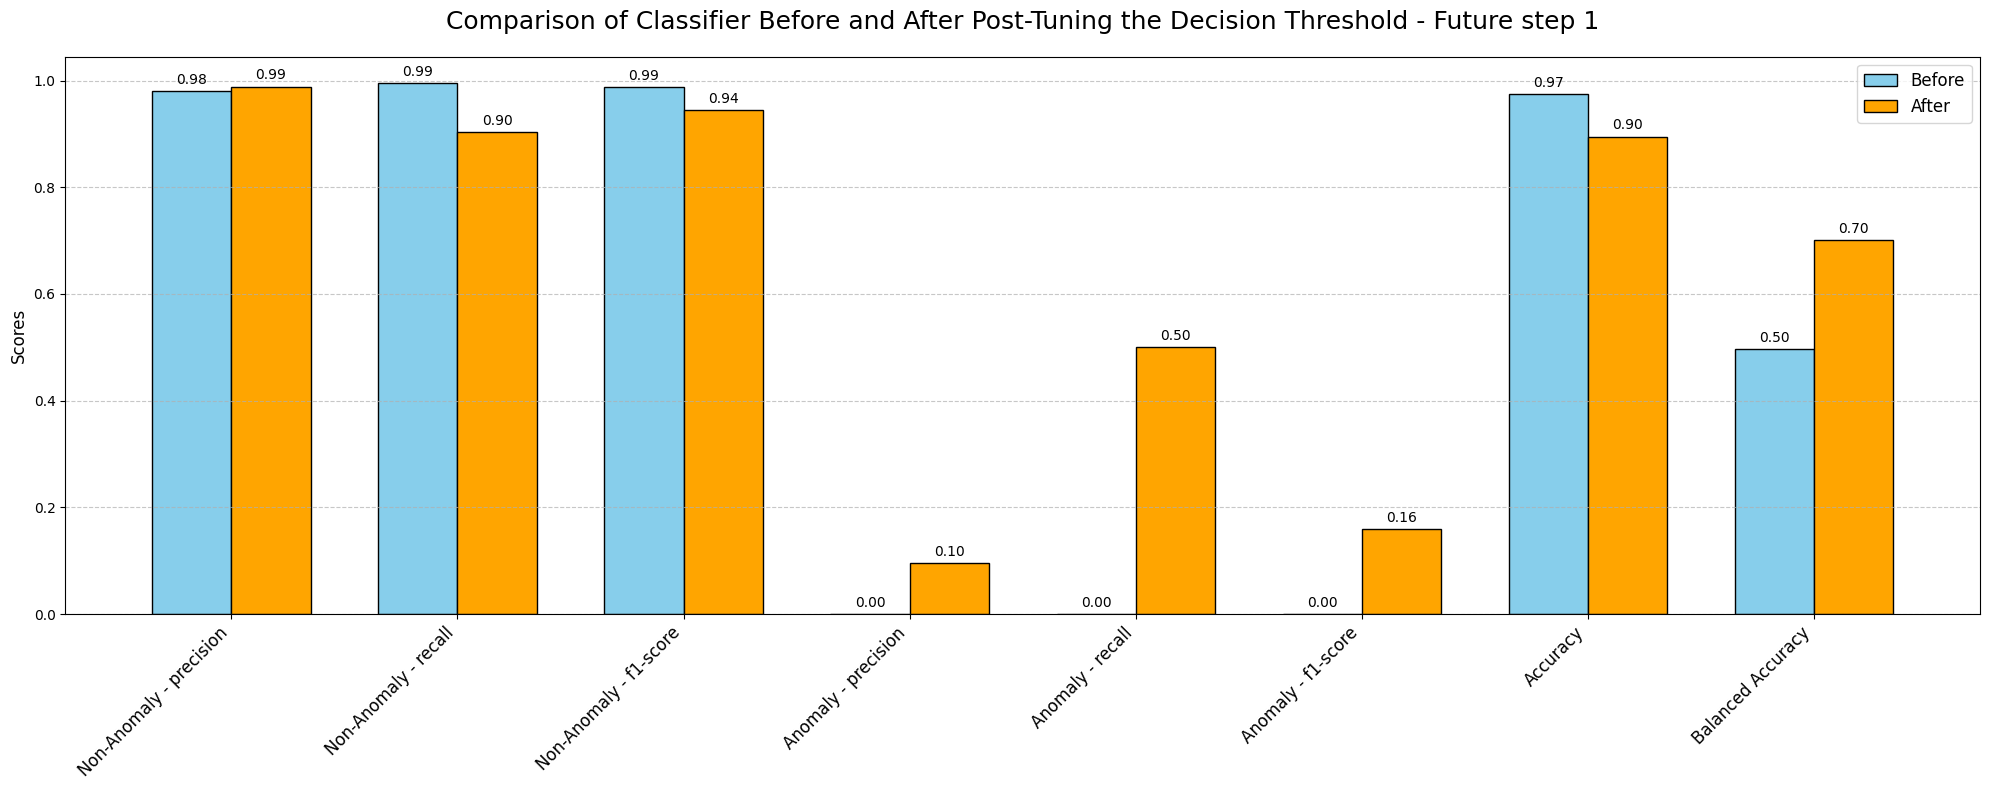

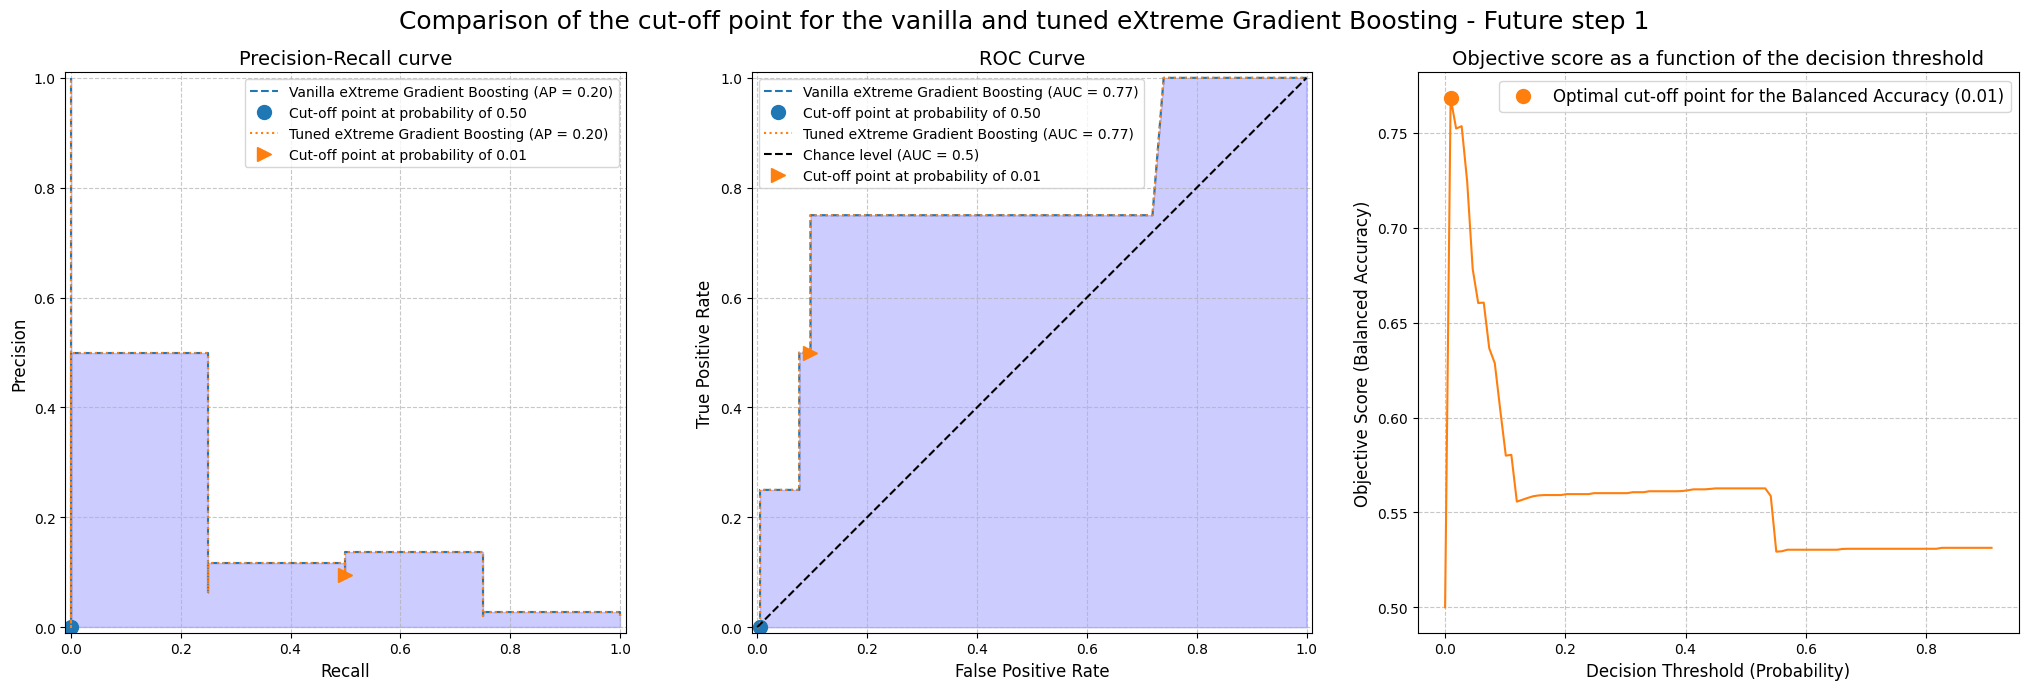

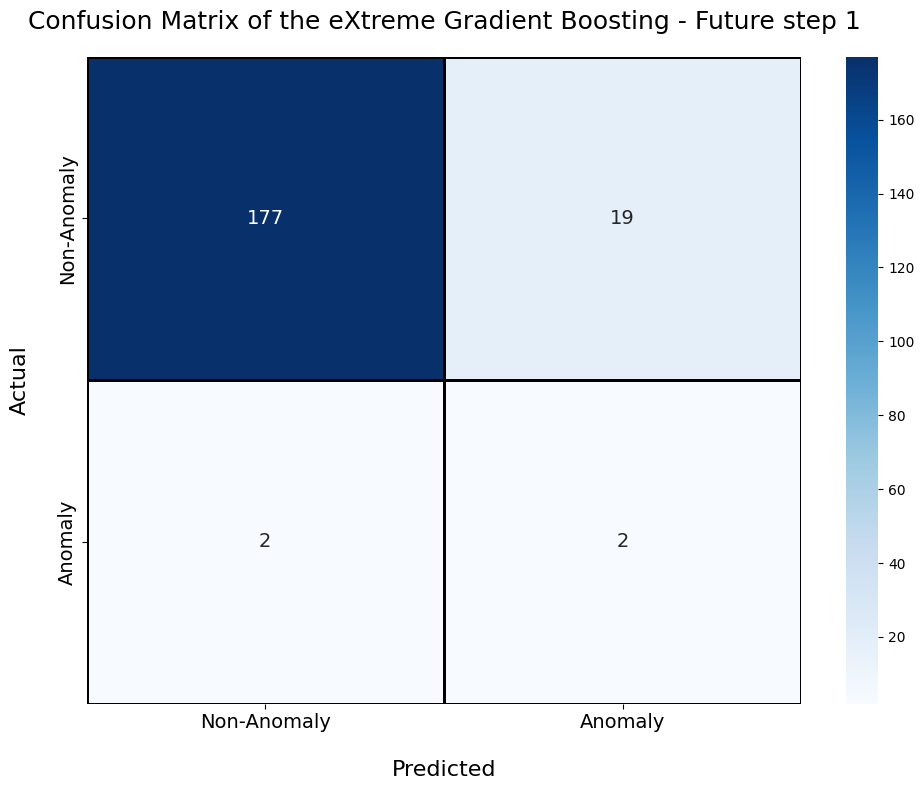

In [5]:
cnc.evaluate()